# VADER (Valence Aware Dictionary and sEntiment Reasoner)

The **VADER (Valence Aware Dictionary and sEntiment Reasoner)** library is a popular Python tool used for sentiment analysis, especially well-suited for analyzing social media texts, product reviews, and other informal language.

---

## Key Features of VADER:

### 1. Rule-Based Sentiment Analysis:
- VADER uses a lexicon of words with pre-assigned sentiment intensity scores, ranging from strongly negative to strongly positive.
- It employs heuristics (rules) to account for context, such as:
  - **Intensity Modifiers**: Words like *"very"* or *"extremely"* increase sentiment strength.
  - **Negations**: Words like *"not"* or *"never"* flip the sentiment.

---

### 2. Pre-Trained:
- VADER comes pre-trained with a sentiment lexicon specifically designed for social media, capturing slang, emojis, and acronyms (e.g., *"lol,"* *"smh"*).

---

### 3. Scalable:
- It is lightweight and does not require extensive training, making it easy to apply to datasets of various sizes.

---

### 4. Outputs Multiple Scores:
For a given text, VADER outputs four scores:
- **Positive**: The proportion of text with a positive sentiment.
- **Neutral**: The proportion of text with a neutral sentiment.
- **Negative**: The proportion of text with a negative sentiment.
- **Compound**: A normalized score between **-1** and **1** representing the overall sentiment.


In [ ]:
# import libraries 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


In [ ]:
# Load the data, i.e., the translated csv file
df = pd.read_csv('/Users/hashimkhan/Documents/greenbootcamps/sentiment_analysis_X/translated_data/translatedText.csv', sep=",")
df.head()

,username,location,tweet_text,created_at,retweets,likes,language,tweet_text_english
0,massageportal24,Basel,Massageportal24 Anbieter Eintrag erstellen usw,2025-01-09 18:33:23+00:00,0,0,de,Massageportal24 Provider Create entry etc
1,ChantalStadelm1,Luzern,Schtzt eure haltet euch konsequent von jeglich...,2025-01-09 17:49:15+00:00,0,1,de,Beware of all life-spans of the WHO Swissmedic...
2,berlinerzeitung,Berlin,Adipositas tdliche Prionenkrankheiten Hitzestr...,2025-01-09 17:02:00+00:00,0,4,de,Obesity of prion diseases Heat stress Deficien...
3,pp_gesundheit,no_location,DIOSynVax grndet neues Beratungsgremium um die...,2025-01-09 16:34:33+00:00,0,0,de,DIOSynVax opens new advisory body to advance t...
4,MichaPfahl,Germany,Gesundheitsfachkrfte Tauchen Sie in die Welt d...,2025-01-09 16:31:42+00:00,0,0,de,Health professionals Immerse yourself in the w...


In [6]:
df["tweet_text_english"]

0              Massageportal24 Provider Create entry etc
1      Beware of all life-spans of the WHO Swissmedic...
2      Obesity of prion diseases Heat stress Deficien...
3      DIOSynVax opens new advisory body to advance t...
4      Health professionals Immerse yourself in the w...
                             ...                        
379         sent to found on updayDE for demolition work
380    In both cases, as in the case of broken buildi...
381    If the people of X do not believe it, electric...
382                Die SALTED die die Welt beenden knnte
383    Apparently on in Loud police is on Thursday at...
Name: tweet_text_english, Length: 384, dtype: object

In [7]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# Apply sentiment analysis
df['Sentiment'] = df['tweet_text_english'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [9]:
# Classify sentiment as positive, neutral, or negative
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

In [10]:
# View the results
print(df[['tweet_text_english', 'Sentiment_Label']])

                                    tweet_text_english Sentiment_Label
0            Massageportal24 Provider Create entry etc        positive
1    Beware of all life-spans of the WHO Swissmedic...        negative
2    Obesity of prion diseases Heat stress Deficien...        negative
3    DIOSynVax opens new advisory body to advance t...        negative
4    Health professionals Immerse yourself in the w...        negative
..                                                 ...             ...
379       sent to found on updayDE for demolition work         neutral
380  In both cases, as in the case of broken buildi...        negative
381  If the people of X do not believe it, electric...        negative
382              Die SALTED die die Welt beenden knnte        negative
383  Apparently on in Loud police is on Thursday at...        negative

[384 rows x 2 columns]


# Tabulate Library

We are using the **`tabulate`** library to display our output in a more readable and formatted way.  
This library helps present tabular data in a visually appealing manner by formatting it as plain text, grid, or other styles.

### Example Use:
- Format data into tables.
- Display tables with different styles, such as `plain`, `grid`, `fancy_grid`, etc.


In [ ]:
from tabulate import tabulate
# Apply sentiment analysis and extract lexicon scores
df['Sentiment_Scores'] = df['tweet_text_english'].apply(lambda x: analyzer.polarity_scores(x))

# Expand the lexicon scores into separate columns
df[['pos', 'neu', 'neg', 'compound']] = df['Sentiment_Scores'].apply(pd.Series)

# Select rows 155 to 160
selected_rows = df[['tweet_text_english', 'pos', 'neu', 'neg', 'compound', 'Sentiment_Label']].iloc[155:161]

# Convert the dataframe to a pretty table
print(tabulate(selected_rows, headers='keys', tablefmt='pretty'))

+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+-------+-------+----------+-----------------+
|     |                                                                                                 tweet_text_english                                                                                                 |  pos  |  neu  |  neg  | compound | Sentiment_Label |
+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+-------+-------+----------+-----------------+
| 155 |                    niusde We now know that two-thirds of the Arabic or Turkish names have volunteered to the police this for our important knowledge of the through not to

# Data Visualization

Here, we visualize the insights that we gathered from the data using **Matplotlib**.  
Matplotlib is a powerful library in Python that allows us to create various types of plots and charts to better understand patterns, trends, and relationships within the dataset.


## Chart Explanation

The chart visually compares the **distribution of sentiment labels** in your dataset.  
- Each bar corresponds to a specific **sentiment** (e.g., positive, neutral, negative).  
- The height of the bar indicates how many **tweets** fall under that sentiment.  

This visualization helps to easily identify which sentiment is the **most** or **least prevalent** in the dataset.


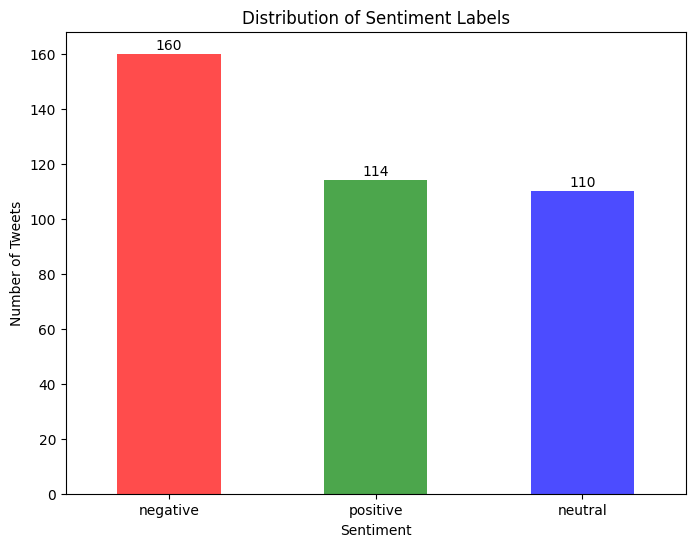

In [12]:
import matplotlib.pyplot as plt
# Assuming your DataFrame is `df`
# Group by Sentiment_Label to count tweets
sentiment_counts = df["Sentiment_Label"].value_counts()

# Plot sentiment counts
plt.figure(figsize=(8, 6))
bars = sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'], alpha=0.7)

# Add labels on top of each bar
for bar in bars.containers:
    for height, label in zip(bar.datavalues, bar.patches):
        plt.text(
            label.get_x() + label.get_width() / 2,  # X position
            height + 0.5,                          # Y position (just above the bar)
            str(int(height)),                      # Label text
            ha='center',                           # Horizontal alignment
            va='bottom',                           # Vertical alignment
            fontsize=10                            # Font size
        )

plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   username            384 non-null    object 
 1   location            384 non-null    object 
 2   tweet_text          384 non-null    object 
 3   created_at          384 non-null    object 
 4   retweets            384 non-null    int64  
 5   likes               384 non-null    int64  
 6   language            384 non-null    object 
 7   tweet_text_english  384 non-null    object 
 8   Sentiment           384 non-null    float64
 9   Sentiment_Label     384 non-null    object 
 10  Sentiment_Scores    384 non-null    object 
 11  pos                 384 non-null    float64
 12  neu                 384 non-null    float64
 13  neg                 384 non-null    float64
 14  compound            384 non-null    float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.1+ KB

# Scatter Plot Explanation

This scatter plot visualizes the relationship between **compound sentiment scores** and the **number of likes** received by tweets in your dataset.

- The **X-axis** represents the **compound sentiment score**, which is a measure of the overall sentiment of each tweet.  
- The **Y-axis** represents the **number of likes**, showing how many likes each tweet has received.  
- Each point in the scatter plot corresponds to a tweet, with its **compound sentiment score** on the X-axis and **number of likes** on the Y-axis.  
- The points are colored **purple** and have some **transparency** (using `alpha=0.6`), making the plot visually clearer when points overlap.

This chart helps you identify any correlation between the sentiment of tweets and their popularity (as measured by likes).


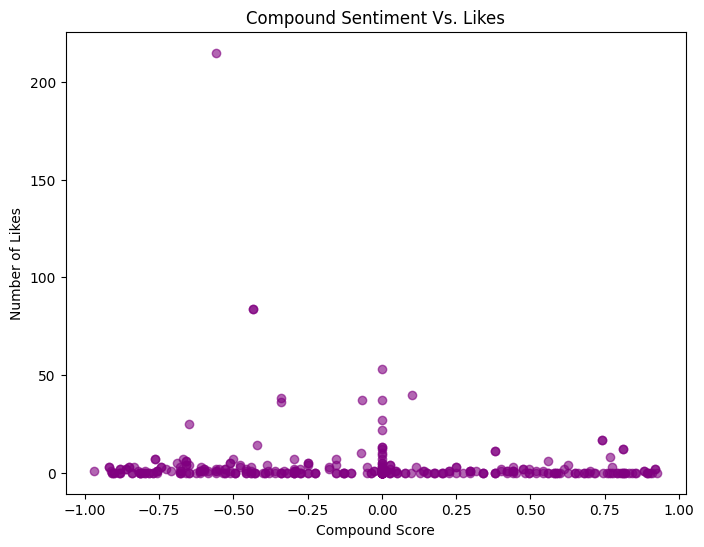

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['compound'], df['likes'], alpha=0.6, c='purple')
plt.title('Compound Sentiment Vs. Likes')
plt.xlabel('Compound Score')
plt.ylabel('Number of Likes')
plt.show()


### It can be observed that, negative sentiments have got more likes.

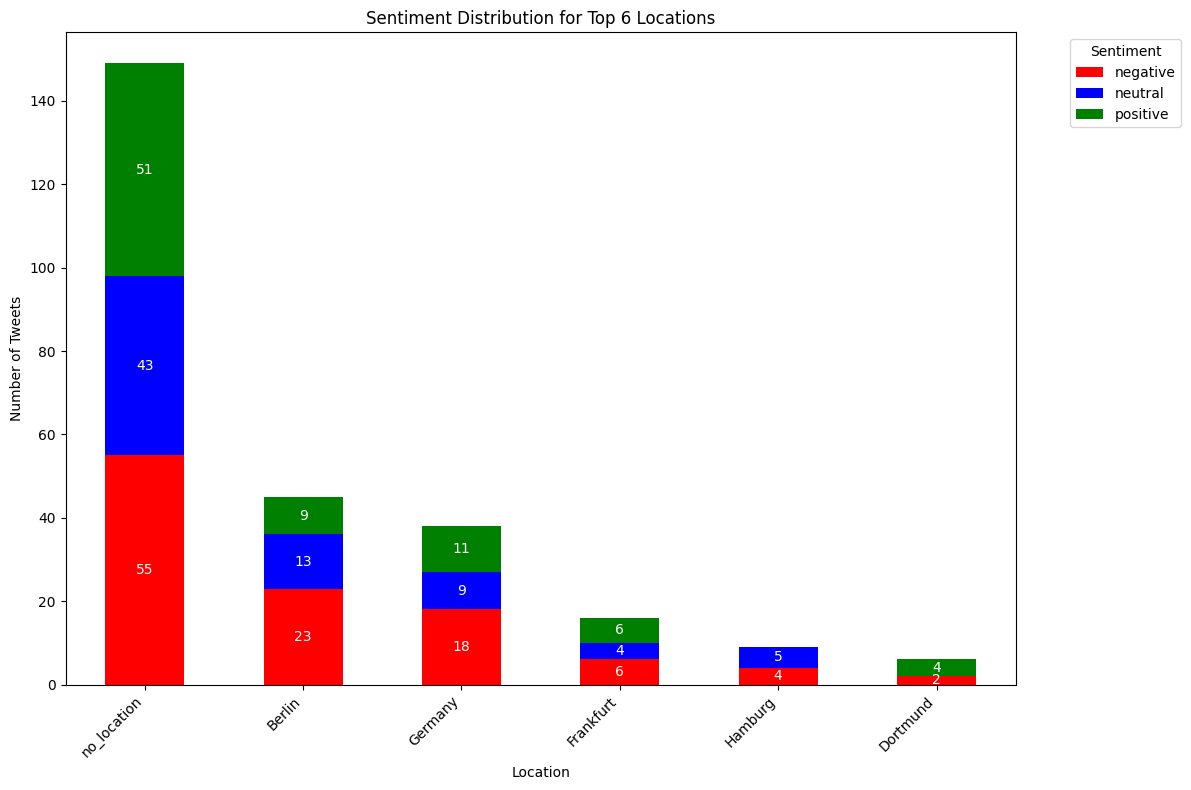

In [ ]:

# Example DataFrame structure (replace with your actual DataFrame)
# df should have columns: 'Region', 'Sentiment_Label'
# Example data preparation (for illustration purposes)
# df = pd.DataFrame({'Region': [...], 'Sentiment_Label': [...]})

# Group by Region and Sentiment_Label
sentiment_counts = (
    df.groupby(['location', 'Sentiment_Label'])
    .size()
    .unstack(fill_value=0)
)

# Calculate the top 10 regions with the highest total tweets
top_10_regions = sentiment_counts.sum(axis=1).nlargest(6).index
sentiment_by_top_regions = sentiment_counts.loc[top_10_regions]

# Define color mapping for sentiment
color_mapping = {'positive': 'green', 'neutral': 'blue', 'negative': 'red'}

# Plot the data
ax = sentiment_by_top_regions.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=[color_mapping[label] for label in sentiment_by_top_regions.columns]
)

# Chart title and labels
plt.title('Sentiment Distribution for Top 6 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Annotate the bars with counts
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Annotate only non-zero bars
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, int(height), ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()




# Displaying Top Positive Sentiment Tweets

This code extracts the **top 2 tweets** with the highest **compound sentiment scores** from the dataset.  
- It **sorts the tweets** by the **compound sentiment score** in descending order, keeping only the top 2 tweets.  
- The **text of each tweet** is then wrapped for better readability (using `wrap_text`).  
- The code then displays the **tweet text** (in English) along with its corresponding **compound sentiment score** in a well-formatted table, using the **tabulate** library.


In [ ]:
import textwrap
from tabulate import tabulate

# Define a function to wrap text
def wrap_text(text, width=50):
    return "\n".join(textwrap.wrap(text, width))

# Sort the DataFrame by the compound score in descending order
top_positive_tweets = df.sort_values(by='compound', ascending=False).head(2)

# Wrap the tweet text
top_positive_tweets['tweet_text_english'] = top_positive_tweets['tweet_text_english'].apply(wrap_text)

# Select relevant columns to display
top_positive_tweets_display = top_positive_tweets[['tweet_text_english', 'compound']]

# Print the top 5 most positive tweets with wrapped text
print(tabulate(top_positive_tweets_display, headers='keys', tablefmt='fancy_grid'))

╒═════╤════════════════════════════════════════════════════╤════════════╕
│     │ tweet_text_english                                 │   compound │
╞═════╪════════════════════════════════════════════════════╪════════════╡
│  61 │ Discover the amazing secret against varicose veins │     0.9274 │
│     │ Our innovative means surprise with effective help  │            │
│     │ Try now                                            │            │
├─────┼────────────────────────────────────────────────────┼────────────┤
│ 235 │ BettinaJarasch Those who want to celebrate safely  │     0.9186 │
│     │ in the future and want to start the new year in a  │            │
│     │ healthy way Should choose from safety grounds Not  │            │
│     │ those are the problem which is the problem every   │            │
│     │ healthy person with a healthy mind needs to        │            │
│     │ recognize the AfD is                               │            │
╘═════╧═══════════════════════════════

# Displaying Top Negative Sentiment Tweets

This code extracts the **top 2 tweets** with the lowest **compound sentiment scores** (most negative sentiment) from the dataset.  
- It **sorts the tweets** by the **compound sentiment score** in ascending order, keeping only the top 2 negative tweets.  
- The **text of each tweet** is then wrapped for better readability (using `wrap_text`).  
- The code then displays the **tweet text** (in English) along with its corresponding **compound sentiment score** in a well-formatted table, using the **tabulate** library.

In [17]:
import textwrap
from tabulate import tabulate

# Define a function to wrap text
def wrap_text(text, width=50):
    return "\n".join(textwrap.wrap(text, width))

# Sort the DataFrame by the compound score in ascending order for negative tweets
top_negative_tweets = df.sort_values(by='compound', ascending=True).head(2)

# Wrap the tweet text
top_negative_tweets['tweet_text_english'] = top_negative_tweets['tweet_text_english'].apply(wrap_text)

# Select relevant columns to display
top_negative_tweets_display = top_negative_tweets[['tweet_text_english', 'compound']]

# Print the top 2 most negative tweets with wrapped text
print(tabulate(top_negative_tweets_display, headers='keys', tablefmt='fancy_grid'))


╒═════╤════════════════════════════════════════════════════╤════════════╕
│     │ tweet_text_english                                 │   compound │
╞═════╪════════════════════════════════════════════════════╪════════════╡
│ 317 │ MOstermann It's not a solution but we can't help   │    -0.9698 │
│     │ but protect the police for now The problem as such │            │
│     │ is a multi-ethnic conflict that can lead to war    │            │
│     │ That's why it's important to have a practical      │            │
│     │ government that recognizes and eliminates the      │            │
│     │ danger.                                            │            │
├─────┼────────────────────────────────────────────────────┼────────────┤
│ 283 │ Environmental aid First of all, we start with a    │    -0.9186 │
│     │ DUH ban or worry that there are people in the DUH  │            │
│     │ who can think up to wallpaper There is also a ban  │            │
│     │ on weapons, however, there are

# Displaying Top Most Liked and Retweeted Posts

This code extracts the **top 2 posts** with the highest number of **likes** and **retweets** from the dataset.  
- It **sorts the tweets** by both **likes** and **retweets** in descending order, keeping the top 2 posts.  
- The **text of each tweet** is wrapped for better readability (using `wrap_text`).  
- The code then displays the **tweet text** (in English) along with its corresponding **number of likes** and **number of retweets** in a well-formatted table, using the **tabulate** library.

In [18]:
import textwrap
from tabulate import tabulate

# Define a function to wrap text
def wrap_text(text, width=50):
    return "\n".join(textwrap.wrap(text, width))

# Sort the DataFrame by the 'likes' column in descending order
most_liked_tweet = df.sort_values(by='likes', ascending=False).head(1)

# Wrap the tweet text
most_liked_tweet['tweet_text_english'] = most_liked_tweet['tweet_text_english'].apply(wrap_text)

# Select relevant columns to display
most_liked_tweet_display = most_liked_tweet[['tweet_text_english', 'likes', 'compound']]

# Print the most liked tweet with wrapped text
print(tabulate(most_liked_tweet_display, headers='keys', tablefmt='fancy_grid'))


╒═════╤════════════════════════════════════════════════════╤═════════╤════════════╕
│     │ tweet_text_english                                 │   likes │   compound │
╞═════╪════════════════════════════════════════════════════╪═════════╪════════════╡
│ 115 │ Attalah Younes 24 fired a rocket that flew through │     215 │    -0.5574 │
│     │ a window into a nursery and exploded Now he landed │         │            │
│     │ in the cell for the time being                     │         │            │
╘═════╧════════════════════════════════════════════════════╧═════════╧════════════╛


In [19]:
import textwrap
from tabulate import tabulate

# Define a function to wrap text
def wrap_text(text, width=50):
    return "\n".join(textwrap.wrap(text, width))

# Sort the DataFrame by the 'retweets' column in descending order
most_retweeted_tweet = df.sort_values(by='retweets', ascending=False).head(1)

# Wrap the tweet text
most_retweeted_tweet['tweet_text_english'] = most_retweeted_tweet['tweet_text_english'].apply(wrap_text)

# Select relevant columns to display
most_retweeted_tweet_display = most_retweeted_tweet[['tweet_text_english', 'retweets', 'compound']]

# Print the most retweeted tweet with wrapped text
print(tabulate(most_retweeted_tweet_display, headers='keys', tablefmt='fancy_grid'))


╒═════╤════════════════════════════════════════════════════╤════════════╤════════════╕
│     │ tweet_text_english                                 │   retweets │   compound │
╞═════╪════════════════════════════════════════════════════╪════════════╪════════════╡
│ 115 │ Attalah Younes 24 fired a rocket that flew through │         30 │    -0.5574 │
│     │ a window into a nursery and exploded Now he landed │            │            │
│     │ in the cell for the time being                     │            │            │
╘═════╧════════════════════════════════════════════════════╧════════════╧════════════╛


In [24]:
import textwrap
from tabulate import tabulate

# Define a function to wrap text
def wrap_text(text, width=50):
    return "\n".join(textwrap.wrap(text, width))

# Sort the DataFrame by 'likes' to get the most liked tweet
most_liked_tweet = df.sort_values(by='likes', ascending=False).head(1)

# Sort the DataFrame by 'retweets' to get the most retweeted tweet
most_retweeted_tweet = df.sort_values(by='retweets', ascending=False).head(1)

# Wrap the tweet text for both most liked and most retweeted tweets
most_liked_tweet['tweet_text_english'] = most_liked_tweet['tweet_text_english'].apply(wrap_text)
most_retweeted_tweet['tweet_text_english'] = most_retweeted_tweet['tweet_text_english'].apply(wrap_text)

# Add the 'retweets' column to the most liked tweet for display
most_liked_tweet['retweets'] = most_retweeted_tweet['retweets'].iloc[0]

# Select relevant columns to display
most_liked_tweet_display = most_liked_tweet[['tweet_text_english', 'likes', 'compound', 'retweets']]

# Print the most liked tweet with wrapped text and retweet count
print(tabulate(most_liked_tweet_display, headers='keys', tablefmt='fancy_grid'))


╒═════╤════════════════════════════════════════════════════╤═════════╤════════════╤════════════╕
│     │ tweet_text_english                                 │   likes │   compound │   retweets │
╞═════╪════════════════════════════════════════════════════╪═════════╪════════════╪════════════╡
│ 115 │ Attalah Younes 24 fired a rocket that flew through │     215 │    -0.5574 │         30 │
│     │ a window into a nursery and exploded Now he landed │         │            │            │
│     │ in the cell for the time being                     │         │            │            │
╘═════╧════════════════════════════════════════════════════╧═════════╧════════════╧════════════╛
